In [27]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import ToTensor

In [28]:
data_train = torchvision.datasets.MNIST('./data',download=True, train=True,transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data',download=True, train=False,transform=ToTensor())

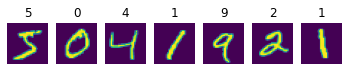

In [29]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

In [30]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:', data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [31]:
net = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784,10),
        nn.LogSoftmax())

In [32]:
print('Digit to be predicted: ',data_train[0][1])
torch.exp(net(data_train[0][0]))

Digit to be predicted:  5


/Users/edwardquarm/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[0.1349, 0.0928, 0.0962, 0.0896, 0.1183, 0.0710, 0.1268, 0.0766, 0.0949,
         0.0989]], grad_fn=<ExpBackward>)

In [33]:
train_loader = torch.utils.data.DataLoader(data_train, batch_size=64)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=64)

In [34]:

def train_epoch(net, dataloader, lr = 0.01, optimizer =None, loss_fn = nn.NLLLoss()):
    optimizer = torch.optim.Adam(net.parameters(), lr = lr)
    net.train()
    total_loss, acc, count = 0,0,0
    for features, labels in dataloader:
        optimizer.zero_grad()
        out = net(features)
        loss = loss_fn(out,labels)
        loss.backward()
        optimizer.step()
        total_loss += loss
        _,predicted = torch.max(out,1)
        acc += (predicted == labels).sum()
        count += len(labels)
    return total_loss.item()/count, acc.item()/count

In [35]:
train_epoch(net,train_loader)

(0.005923516337076823, 0.89315)

In [36]:
def validate(net, dataloader, loss_fn = nn.NLLLoss()):
    net.eval()
    count,acc,loss = 0,0,0
    with torch.no_grad():
        for features, labels in dataloader:
            out = net(features)
            loss += loss_fn(out,labels)
            pred = torch.max(out,1)[1]
            acc += (pred == labels).sum()
            count += len(labels)
    return loss.item()/count, acc.item()/count

In [37]:
validate(net,test_loader)

(0.0058663745880126955, 0.8938)

In [38]:
def train(net,train_loader,test_loader,optimizer=None,lr=0.01,epochs=10,loss_fn=nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for ep in range(epochs):
        tl,ta = train_epoch(net,train_loader,optimizer=optimizer,lr=lr,loss_fn=loss_fn)
        vl,va = validate(net,test_loader,loss_fn=loss_fn)
        print(f"Epoch {ep:2}, Train acc={ta:.3f}, Val acc={va:.3f}, Train loss={tl:.3f}, Val loss={vl:.3f}")
        res['train_loss'].append(tl)
        res['train_acc'].append(ta)
        res['val_loss'].append(vl)
        res['val_acc'].append(va)
    return res

# Re-initialize the network to start from scratch
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,10), # 784 inputs, 10 outputs
        nn.LogSoftmax())

hist = train(net,train_loader,test_loader,epochs=5)

Epoch  0, Train acc=0.893, Val acc=0.893, Train loss=0.006, Val loss=0.006
Epoch  1, Train acc=0.910, Val acc=0.898, Train loss=0.005, Val loss=0.006
Epoch  2, Train acc=0.913, Val acc=0.898, Train loss=0.005, Val loss=0.006
Epoch  3, Train acc=0.915, Val acc=0.896, Train loss=0.005, Val loss=0.006
Epoch  4, Train acc=0.916, Val acc=0.893, Train loss=0.005, Val loss=0.007


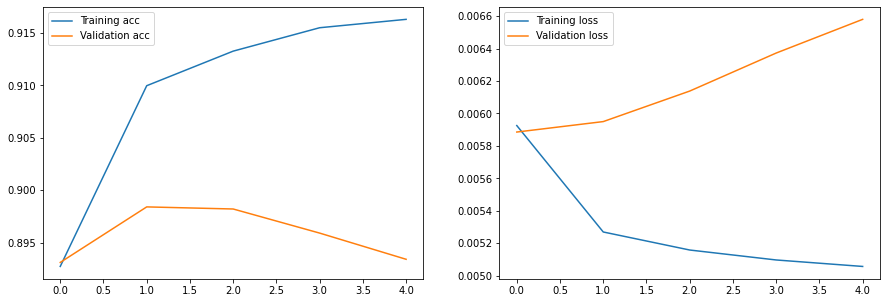

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(hist['train_acc'], label='Training acc')
plt.plot(hist['val_acc'], label='Validation acc')
plt.legend()
plt.subplot(122)
plt.plot(hist['train_loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.legend()

In [40]:
weight_tensor = next(net.parameters())
enumerate(weight_tensor)

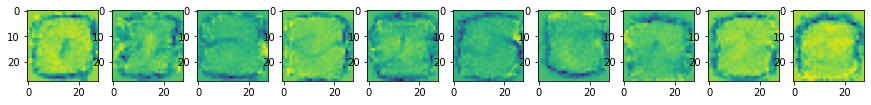

In [41]:
weight_tensor = next(net.parameters())
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i,x in enumerate(weight_tensor):
    ax[i].imshow(x.view(28,28).detach())

In [42]:
x.view()

TypeError: view() missing 1 required positional arguments: "size"

In [ ]:
28*28